In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Read data on Airbnb property listings in Boston (source: https://www.kaggle.com/airbnb/boston)

In [3]:
listings = pd.read_csv("listings.csv")
print(listings.shape)
listings.head() # each row is a unique listing

(3585, 95)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


## Which are the top-rated neighbourhoods in terms of location? Do properties in these neighbourhoods tend to be more expensive to book?

We clean the data in the following ways to obtain the mean location rating and mean price of each neighbourhood
- exclude listings with no neighbourhood specified
- convert the price column to a float
- compute the mean locating rating and price of each neighbourhood, as well as the no. of valid ratings and price

In [4]:
# exclude listings whose neighbourhood was not specified
nb = listings[~listings.neighbourhood.isnull()].copy()
# get mean price of each neighbourhood
nb['price'] = nb.price.replace('[\$,]', '', regex=True).astype(float)
nb_price = nb.groupby('neighbourhood').mean()['price']
# get mean location score of each neighbourhood
nb_loc_score = nb.groupby('neighbourhood').mean()['review_scores_location']
# get no. of non-null prices in each neighbourhood
nb_price_cnt = nb.groupby('neighbourhood').count()['price']
# get no. of non-null scores in each neighbourhood
nb_loc_score_cnt = nb.groupby('neighbourhood').count()['review_scores_location']
# merge Series
nb2 = pd.concat([nb_price, nb_loc_score, nb_price_cnt, nb_loc_score_cnt], axis=1).reset_index()
nb2.columns = ['neighbourhood','price_mean','location_score_mean','n_valid_prices','n_valid_loc_scores']
nb2.sort_values(by='location_score_mean', ascending=False)

,neighbourhood,price_mean,location_score_mean,n_valid_prices,n_valid_loc_scores
14,Government Center,205.333333,10.000000,3,3
3,Brookline,130.375000,10.000000,8,2
6,Chestnut Hill,70.750000,10.000000,4,2
13,Financial District,283.692308,10.000000,13,4
21,North End,195.512000,9.953271,125,107
2,Beacon Hill,212.080460,9.941176,174,153
1,Back Bay,245.457045,9.940909,291,220
28,West End,221.602941,9.729730,68,37
26,South End,206.721477,9.725806,298,248
10,Downtown Crossing,273.500000,9.619048,26,21


We exclude neighbourhoods with fewer than 20 location ratings as aggregate metrics are more likely to be skewed by outliers when the sample size is small.

Customer ratings tell us that **North End, Beacon Hill and Back Bay are the best locations** to stay at.

We also find that the mean price of a home in a neighbourhood is positively correlated with the locating rating given by customers, which is what we would expect intuitively. However, we observe that the mean price could be quite different even among neighbourhoods with similar average location scores (e.g. for an average location score of 9.4 -9.5, average prices range from \\$110-230), suggesting that there are likely other property features other than location that influence a property's listing price.

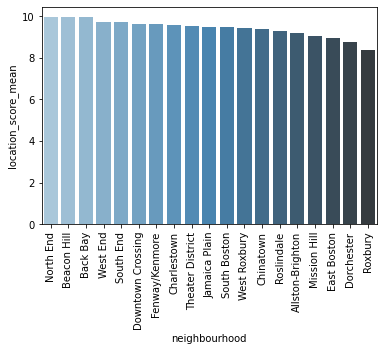

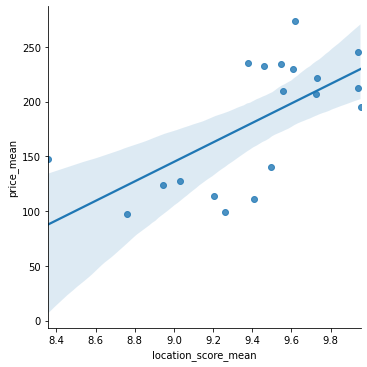

In [5]:
# exclude neighbourhoods with <20 location reviews
nb3 = nb2[nb2.n_valid_loc_scores>=20]

# which are the best locations?
bar = sns.barplot(x='neighbourhood',y='location_score_mean', data=nb3.sort_values(by='location_score_mean', ascending=False), palette='Blues_d')
for item in bar.get_xticklabels():
    item.set_rotation(90)

# is a higher location score positively associated with higher prices?
sns.lmplot(x='location_score_mean',y='price_mean', data=nb3)